In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [2]:
def train_test_splits(df,ratio,shuffle=True):
    if shuffle:
        print("Shuffle")
        df.sample(frac=1)
    size = int(df.shape[0]*ratio)
    return df.iloc[:size],df.iloc[size:]

In [3]:
data = pd.read_csv("breast_cancer.csv")
diag = { "M": 1, "B": 0}
data['diagnosis'].replace(diag,inplace=True)
data = data.drop(['id','Unnamed: 32'],axis=1)
train_set,test_set = train_test_splits(data,0.8)

Shuffle


In [4]:
#Drop label (data frame type)
label_train= train_set['diagnosis']
train_set = train_set.drop('diagnosis',axis=1)

label_test = test_set['diagnosis']
test_set = test_set.drop('diagnosis',axis=1)

In [5]:
#torch
x_data = Variable(torch.from_numpy(train_set.values))
y_data = Variable(torch.from_numpy(label_train.values))

xtest_data = Variable(torch.from_numpy(test_set.values))
ytest_data = Variable(torch.from_numpy(label_test.values))

In [6]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = Model()

In [7]:
# hyperparameters
input_size = 784
output_size = 10
hidden_size = 200


In [8]:
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
loss_func = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [9]:
epochs = 3000
history = { "loss": [], "accuracy": [], "loss_val": [], "accuracy_val": [] }

for i in tqdm(range(epochs)):
    y_pred = model(x_data.float())
    loss = loss_func(y_pred, y_data.view(-1,1).float())
    
    prediction = [1 if x > 0.5 else 0 for x in y_pred.data.numpy()]
    correct = (prediction == y_data.numpy()).sum()
    
    
    y_val_pred = model(xtest_data.float())
    loss_val = loss_func(y_val_pred,ytest_data.view(-1,1).float())
    prediction_val = [1 if x > 0.5 else 0 for x in y_val_pred.data.numpy()]
    correct_val = (prediction_val == ytest_data.numpy()).sum()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    history["loss"].append(loss.item())
    history["accuracy"].append(100 * correct / len(prediction))
    history["loss_val"].append(loss_val.item())
    history["accuracy_val"].append(100 * correct_val / len(prediction_val))


100%|██████████| 3000/3000 [00:40<00:00, 73.28it/s] 


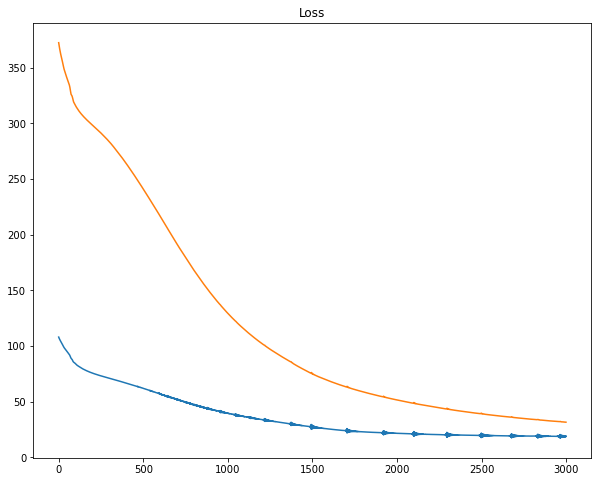

In [10]:
#loss
plt.figure(figsize=(10,8))
plt.title("Loss") 
plt.plot(history["loss_val"])
plt.plot(history["loss"])

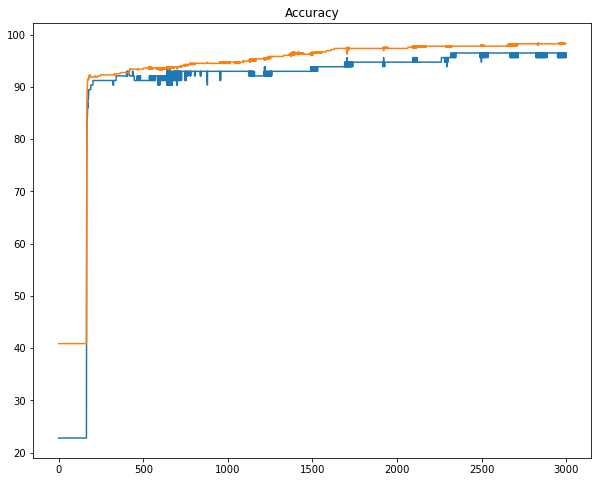

In [11]:
#Accuracy
plt.figure(figsize=(10,8))
plt.title("Accuracy") 
plt.plot(history["accuracy_val"])
plt.plot(history["accuracy"])